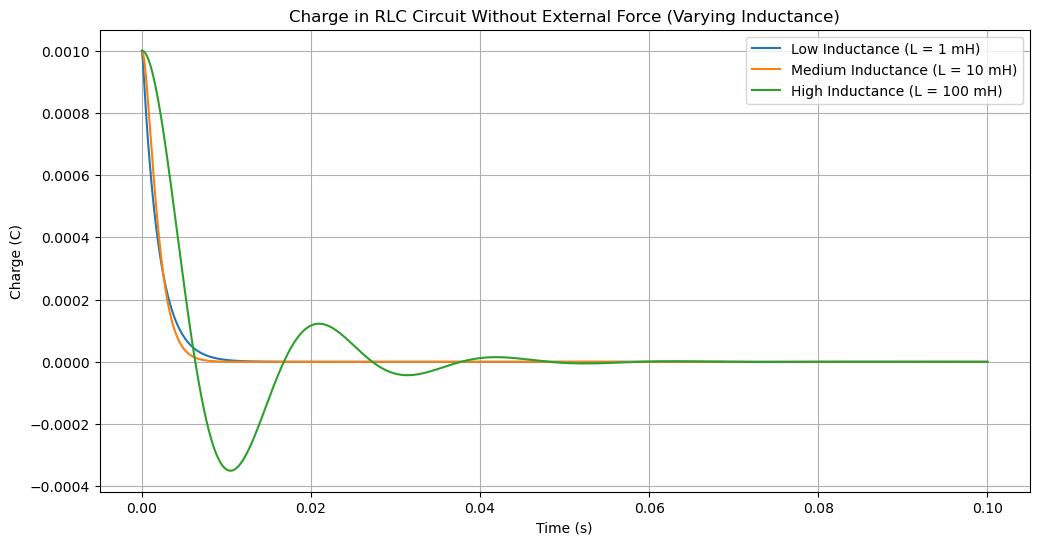

In [1]:
# Reimport necessary libraries after reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters for RLC circuit without external force (no sinusoidal source)
C = 100e-6  # Capacitance in farads
q0, i0 = 1e-3, 0  # Initial charge and current (non-zero initial charge)
R = 20  # Fixed resistance

# Time span for simulation
t_span = (0, 0.1)  # 100 ms
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Inductance values for different damping conditions
inductances_no_force = {
    "Low Inductance (L = 1 mH)": 1e-3,
    "Medium Inductance (L = 10 mH)": 10e-3,
    "High Inductance (L = 100 mH)": 100e-3,
}

# Define the RLC ODE for no external force
def rlc_no_force_ode(t, y, R, L, C):
    q, i = y  # q = charge, i = current
    dqdt = i
    didt = -(R * i + q / C) / L
    return [dqdt, didt]

# Plotting the charge vs time for different inductance values (no external force)
plt.figure(figsize=(12, 6))

for label, L in inductances_no_force.items():
    sol = solve_ivp(rlc_no_force_ode, t_span, [q0, i0], args=(R, L, C), t_eval=t_eval, method='RK45')
    plt.plot(sol.t, sol.y[0], label=label)  # Charge (y[0])

plt.title("Charge in RLC Circuit Without External Force (Varying Inductance)")
plt.xlabel("Time (s)")
plt.ylabel("Charge (C)")
plt.legend(loc="best")
plt.grid(True)
plt.show()
